In [63]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [1]:
charity_data = "cleaned_data.csv"
charity_df = pd.read_csv("cleaned_data.csv")
charity_df.head()

,Unnamed: 0,Charity,ein,Mission,Cause,Category Name,Rating,State,Contributions
0,0,Mount Desert Island Biological Laboratory,10202467,The MDI Biological Laboratory is a rapidly gro...,"{'causeID': 35, 'causeName': 'Non-Medical Scie...",Research and Public Policy,92.61,ME,12924245.0
1,1,United Way of Eastern Maine,10211478,"Working with the communities we serve, the Uni...","{'causeID': 42, 'causeName': 'United Ways', 'c...",Community Development,81.84,ME,2438155.0
2,2,The Jackson Laboratory,10211513,"The Jackson Laboratory, founded in 1929, is an...","{'causeID': 14, 'causeName': 'Medical Research...",Health,93.16,ME,331241336.0
3,3,Maine Historical Society,10211530,"Founded in 1822, the Maine Historical Society ...","{'causeID': 6, 'causeName': 'Libraries, Histor...","Arts, Culture, Humanities",80.31,ME,2219692.0
4,4,Boys & Girls Clubs of Southern Maine,10211543,"For more than 100 years, Boys & Girls Clubs of...","{'causeID': 16, 'causeName': 'Youth Developmen...",Human Services,91.54,ME,3859985.0


In [6]:
categories = list(charity_df["Category Name"].value_counts().index)
categories

['Human Services',
 'Arts, Culture, Humanities',
 'Health',
 'Community Development',
 'Education',
 'International',
 'Animals',
 'Religion',
 'Environment',
 'Human and Civil Rights',
 'Research and Public Policy']

In [13]:
charities_data_by_category = [charity_df[charity_df["Category Name"] == category] for category in categories]
charities_data_by_category[1].head()

,Unnamed: 0,Charity,ein,Mission,Cause,Category Name,Rating,State,Contributions
3,3,Maine Historical Society,10211530,"Founded in 1822, the Maine Historical Society ...","{'causeID': 6, 'causeName': 'Libraries, Histor...","Arts, Culture, Humanities",80.31,ME,2219692.0
15,15,Maine Maritime Museum,10271477,Maine Maritime Museum celebrates Maine's marit...,"{'causeID': 3, 'causeName': 'Museums', 'charit...","Arts, Culture, Humanities",86.31,ME,4538187.0
18,18,Children's Museum & Theatre of Maine,10352258,The Children's Museum & Theatre of Maine exist...,"{'causeID': 3, 'causeName': 'Museums', 'charit...","Arts, Culture, Humanities",78.06,ME,2943913.0
20,20,Farnsworth Art Museum,10368070,"Celebrating Maine's role in American art, the ...","{'causeID': 3, 'causeName': 'Museums', 'charit...","Arts, Culture, Humanities",80.68,ME,6804518.0
21,21,Portland Museum of Art,10378420,The Portland Museum of Art strives to engage a...,"{'causeID': 3, 'causeName': 'Museums', 'charit...","Arts, Culture, Humanities",83.24,ME,11722533.0


In [19]:
ratings_by_category = [charity_data["Rating"] for charity_data in charities_data_by_category]


In [34]:
average_ratings = [np.average(ratings) for ratings in ratings_by_category]
category_average_rating = dict(zip(categories, average_ratings))
category_average_rating

{'Human Services': 87.63863110008272,
 'Arts, Culture, Humanities': 85.18424735557363,
 'Health': 85.56977678571427,
 'Community Development': 88.73679900744415,
 'Education': 86.4894578313253,
 'International': 87.31864,
 'Animals': 87.91016632016631,
 'Religion': 80.53586206896551,
 'Environment': 87.88359728506788,
 'Human and Civil Rights': 85.64879120879121,
 'Research and Public Policy': 84.96560185185184}

In [22]:
anova_result = stats.f_oneway(*ratings_by_category)
anova_result

F_onewayResult(statistic=44.27120279740581, pvalue=1.5216980457223744e-86)

In [31]:
non_religion_charity_ratings = [charity_data["Rating"] for charity_data in charities_data_by_category if charity_data.iloc[0]["Category Name"] != "Religion"]
non_religion_anova_results = stats.f_oneway(*non_religion_charity_ratings)
non_religion_anova_results


F_onewayResult(statistic=20.32781307026106, pvalue=3.132350346815215e-34)

In [35]:
n_minus_one_rating_lists = [[charity_data["Rating"] for charity_data in charities_data_by_category if charity_data.iloc[0]["Category Name"] != category] for category in categories]


In [89]:
n_minus_one_anovas = [stats.f_oneway(*n_minus_one_rating_list) for n_minus_one_rating_list in n_minus_one_rating_lists]
n_minus_one_anovas


[F_onewayResult(statistic=42.6959974424621, pvalue=7.851642490337403e-75),
 F_onewayResult(statistic=43.01131010473556, pvalue=8.816282065706442e-76),
 F_onewayResult(statistic=51.79852676933562, pvalue=7.146701341618841e-92),
 F_onewayResult(statistic=40.061244533214555, pvalue=1.7219677735962766e-70),
 F_onewayResult(statistic=48.2531491578904, pvalue=1.6934218572185954e-85),
 F_onewayResult(statistic=48.66290902099352, pvalue=2.9529088192088863e-86),
 F_onewayResult(statistic=47.0353057175201, pvalue=2.5126486364378008e-83),
 F_onewayResult(statistic=20.32781307026106, pvalue=3.132350346815215e-34),
 F_onewayResult(statistic=47.10182898935228, pvalue=1.854450430734878e-83),
 F_onewayResult(statistic=49.69844820224886, pvalue=3.2006040386476066e-88),
 F_onewayResult(statistic=47.97201212730113, pvalue=4.151286731161476e-85)]

In [91]:
p_values = [n_minus_one_anova.pvalue for n_minus_one_anova in n_minus_one_anovas]
least_different_p_value = np.max(p_values)
least_different_p_value

3.132350346815215e-34

In [44]:
most_different_category = [categories[index] for index, p_value in enumerate(p_values) if p_value == least_different_p_value][0]
most_different_category

'Religion'

In [76]:
non_religious_categories = [category for category in categories if category != "Religion"]
non_religious_charity_data_by_cat = [charity_df[charity_df["Category Name"] == category] for category in non_religious_categories]


next_rating_lists = [[charity_data["Rating"] for charity_data in non_religious_charity_data_by_cat if charity_data.iloc[0]["Category Name"] != category] for category in non_religious_categories]
next_rating_anovas = [stats.f_oneway(*next_rating_list) for next_rating_list in next_rating_lists]
next_rating_anovas


[F_onewayResult(statistic=19.56641685239535, pvalue=2.2485361213289832e-29),
 F_onewayResult(statistic=14.066432838302005, pvalue=1.724861102382842e-20),
 F_onewayResult(statistic=21.43831021716523, pvalue=1.5827695037544036e-32),
 F_onewayResult(statistic=16.13820301941841, pvalue=7.229495804908632e-24),
 F_onewayResult(statistic=22.233461597650216, pvalue=7.640230319106455e-34),
 F_onewayResult(statistic=22.774194761676434, pvalue=9.85865215677839e-35),
 F_onewayResult(statistic=21.60229844049493, pvalue=8.10549539295136e-33),
 F_onewayResult(statistic=21.671113485346613, pvalue=6.221962677003417e-33),
 F_onewayResult(statistic=22.25538472534325, pvalue=6.776971208851882e-34),
 F_onewayResult(statistic=21.13819761360421, pvalue=4.5473775812071657e-32)]

In [57]:
next_p_values = [next_rating_anova.pvalue for next_rating_anova in next_rating_anovas]

next_least_different_p_value = np.max(next_p_values)
next_least_different_p_value

1.724861102382842e-20

In [59]:
most_different_category = [non_religious_categories[index] for index, p_value in enumerate(next_p_values) if p_value == next_least_different_p_value][0]

most_different_category

'Arts, Culture, Humanities'

In [65]:
arts_ratings = charity_df[charity_df["Category Name"] == most_different_category]["Rating"]

/usr/local/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


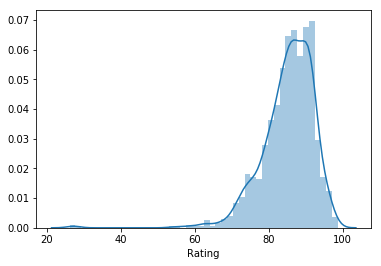

In [66]:
sns.distplot(arts_ratings)

/usr/local/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


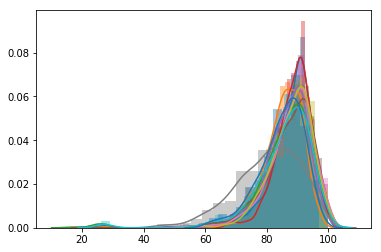

In [70]:
for ratings in ratings_by_category:
    sns.distplot(ratings)

/usr/local/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


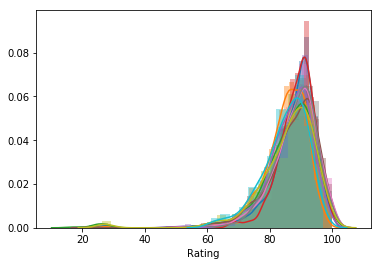

In [78]:
for ratings in [charity_data["Rating"] for charity_data in non_religious_charity_data_by_cat]:
    sns.distplot(ratings)

In [106]:
remaining_data = charity_df[~charity_df["Category Name"].isin(["Religion", "Arts, Culture, Humanities"])]


In [109]:
remaining_data.head()
remaining_categories = [category for category in categories if category not in ["Religion", "Arts, Culture, Humanities"]]
remaining_categories


['Human Services',
 'Health',
 'Community Development',
 'Education',
 'International',
 'Animals',
 'Environment',
 'Human and Civil Rights',
 'Research and Public Policy']